# **• DOMAIN:Banking and finance**

## Importing Necessary Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

from sklearn import metrics
from sklearn.metrics import log_loss,confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')

In [2]:
RS = 42

## 1. Importing the dataset:

#### Dataset 1

In [3]:
Data1=pd.read_csv("Part2 - Data1.csv")
Data1

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level
0,1,25,1,49,91107,4,1.6,1
1,2,45,19,34,90089,3,1.5,1
2,3,39,15,11,94720,1,1.0,1
3,4,35,9,100,94112,1,2.7,2
4,5,35,8,45,91330,4,1.0,2
...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3
4996,4997,30,4,15,92037,4,0.4,1
4997,4998,63,39,24,93023,2,0.3,3
4998,4999,65,40,49,90034,3,0.5,2


#### Dataset 2

In [4]:
Data2=pd.read_csv("Part2 -Data2.csv")
Data2

,ID,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,0,1,0,0,0,NaN
1,2,0,1,0,0,0,NaN
2,3,0,0,0,0,0,NaN
3,4,0,0,0,0,0,NaN
4,5,0,0,0,0,1,NaN
...,...,...,...,...,...,...,...
4995,4996,0,0,0,1,0,0.0
4996,4997,85,0,0,1,0,0.0
4997,4998,0,0,0,0,0,0.0
4998,4999,0,0,0,1,0,0.0


In [5]:
Data=Data1.merge(Data2)

In [6]:
Data.shape

(5000, 14)

In [7]:
Data.head()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,NaN
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,NaN
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,NaN
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,NaN
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,NaN


Checking the datatypes

In [8]:
Data.isna().sum()

ID                      0
Age                     0
CustomerSince           0
HighestSpend            0
ZipCode                 0
HiddenScore             0
MonthlyAverageSpend     0
Level                   0
Mortgage                0
Security                0
FixedDepositAccount     0
InternetBanking         0
CreditCard              0
LoanOnCard             20
dtype: int64

Target variable-LoanOnCard has some NaN values

Let us treat these Nan records as production data and use them for prediction in future.

In [9]:
data_p = Data.copy()
data_p = data_p.loc[data_p["LoanOnCard"].isna()]
data_p.drop('LoanOnCard', axis = 1, inplace = True)
data_p.head()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1


Dropping missing values from the dataset 

In [10]:
Data.dropna(axis=0,inplace=True)

In [11]:
Data.isna().sum()

ID                     0
Age                    0
CustomerSince          0
HighestSpend           0
ZipCode                0
HiddenScore            0
MonthlyAverageSpend    0
Level                  0
Mortgage               0
Security               0
FixedDepositAccount    0
InternetBanking        0
CreditCard             0
LoanOnCard             0
dtype: int64

All the missing values are dropped

### Train-test split

In [12]:
X = Data.drop('LoanOnCard', axis = 1)
Y = Data['LoanOnCard']

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state = RS, test_size = 0.10, stratify = Y)

In [13]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4482, 13), (498, 13), (4482,), (498,))

In [14]:
df = X_train.join(y_train, how = 'inner')
df.sort_index(axis = 0, inplace = True)

In [15]:
df.shape

(4482, 14)

## 2.Data Cleansing

***Information about dataset***

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4482 entries, 9 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   4482 non-null   int64  
 1   Age                  4482 non-null   int64  
 2   CustomerSince        4482 non-null   int64  
 3   HighestSpend         4482 non-null   int64  
 4   ZipCode              4482 non-null   int64  
 5   HiddenScore          4482 non-null   int64  
 6   MonthlyAverageSpend  4482 non-null   float64
 7   Level                4482 non-null   int64  
 8   Mortgage             4482 non-null   int64  
 9   Security             4482 non-null   int64  
 10  FixedDepositAccount  4482 non-null   int64  
 11  InternetBanking      4482 non-null   int64  
 12  CreditCard           4482 non-null   int64  
 13  LoanOnCard           4482 non-null   float64
dtypes: float64(2), int64(12)
memory usage: 525.2 KB


In [17]:
col=['HiddenScore','Level','Security','FixedDepositAccount','InternetBanking','CreditCard','LoanOnCard']

df[col]=df[col].astype('category')

In [18]:
df.dtypes

ID                        int64
Age                       int64
CustomerSince             int64
HighestSpend              int64
ZipCode                   int64
HiddenScore            category
MonthlyAverageSpend     float64
Level                  category
Mortgage                  int64
Security               category
FixedDepositAccount    category
InternetBanking        category
CreditCard             category
LoanOnCard             category
dtype: object

Id feature is unique for each records,therefore it is not useful for model building,we can drop the Id feature

In [19]:
df.drop('ID',axis=1,inplace=True)

***Checking for duplicate entries in the dataset***

In [20]:
Duplicate = df[df.duplicated(keep='first')]
  
print("Duplicate Entries :")
  
Duplicate.shape

Duplicate Entries :


(0, 13)

There are no duplicate entries in the dataset

***Segregating categorical features and numerical features***

In [21]:
num_cols=df.select_dtypes(include=['int64','float64']).columns.tolist()

cat_cols=df.select_dtypes(include=['category','object']).columns.tolist()

In [22]:
print(num_cols)
print(cat_cols)

['Age', 'CustomerSince', 'HighestSpend', 'ZipCode', 'MonthlyAverageSpend', 'Mortgage']
['HiddenScore', 'Level', 'Security', 'FixedDepositAccount', 'InternetBanking', 'CreditCard', 'LoanOnCard']


***Checking for Values in each categorical feature and looking for any special/improper characters***

In [23]:
for i in cat_cols:
     print("{} : {} ".format(i,df[i].unique()))

HiddenScore : [1, 4, 3, 2]
Categories (4, int64): [1, 2, 3, 4] 
Level : [3, 2, 1]
Categories (3, int64): [1, 2, 3] 
Security : [0, 1]
Categories (2, int64): [0, 1] 
FixedDepositAccount : [0, 1]
Categories (2, int64): [0, 1] 
InternetBanking : [0, 1]
Categories (2, int64): [0, 1] 
CreditCard : [0, 1]
Categories (2, int64): [0, 1] 
LoanOnCard : [1.0, 0.0]
Categories (2, float64): [0.0, 1.0] 


## 3.Data Analysis and Visualization

5 Point summary

In [24]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,4482.0,45.298304,11.511016,23.0,35.0,45.0,55.0,67.0
CustomerSince,4482.0,20.053994,11.520364,-3.0,10.0,20.0,30.0,43.0
HighestSpend,4482.0,73.677376,45.917854,8.0,39.0,64.0,98.0,224.0
ZipCode,4482.0,93173.307006,2159.138513,9307.0,92007.0,93555.0,94609.0,96651.0
MonthlyAverageSpend,4482.0,1.944710,1.754562,0.0,0.7,1.5,2.5,10.0
Mortgage,4482.0,55.934851,100.802618,0.0,0.0,0.0,100.0,635.0


***Insights***
- Mean and Median of Age,CustomerSince feature is almost equal.So there won't be any Skewness
- Mean is slightly greater than median in HighestSpend and MonthlyAverageSpend features.We know that if mean is greater than median then the feature is right skewed.Therefore HighestSpend and MonthlyAverageSpend are right skewed
- We can see high fluctuation in mortgage column. 50% of data has zero values but maximum value is 635. This is hugely affected by outliers

***We can check for skewness in the dataset by the following way***

In [25]:
from scipy.stats import shapiro

for feature in num_cols:
    data = df.copy()
    DataToTest = data[feature]
    stat, p = shapiro(DataToTest)
    print(feature)
    print('stat = %.2f, p = %.30f' % (stat, p))
    
    if p > 0.05:
        print('Normal distribution')
        print()
    else:
        print('Not a normal distribution')
        print()

Age
stat = 0.96, p = 0.000000000000000000000000000000
Not a normal distribution

CustomerSince
stat = 0.96, p = 0.000000000000000000000000000000
Not a normal distribution

HighestSpend
stat = 0.93, p = 0.000000000000000000000000000000
Not a normal distribution

ZipCode
stat = 0.68, p = 0.000000000000000000000000000000
Not a normal distribution

MonthlyAverageSpend
stat = 0.85, p = 0.000000000000000000000000000000
Not a normal distribution

Mortgage
stat = 0.63, p = 0.000000000000000000000000000000
Not a normal distribution



- None of the features are normally distributed. We need to make these features normally distributed before building the model by applying some Tranformations(FEATURE ENGINEERING)

## Univariate Analysis

***Univariate analysis of numerical features***

 

 AGE


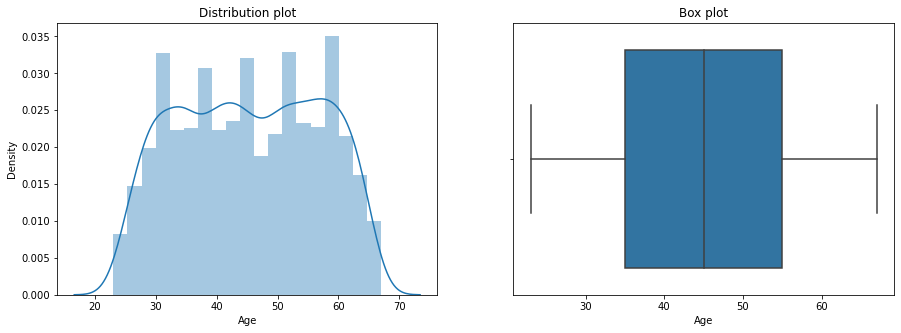

Total number of outliers in Age: 0
Percentage of outliers in Age: 0.0 %
 

 CUSTOMERSINCE


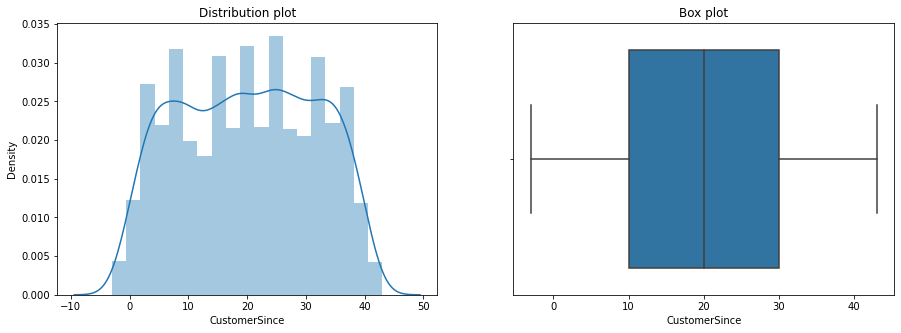

Total number of outliers in CustomerSince: 0
Percentage of outliers in CustomerSince: 0.0 %
 

 HIGHESTSPEND


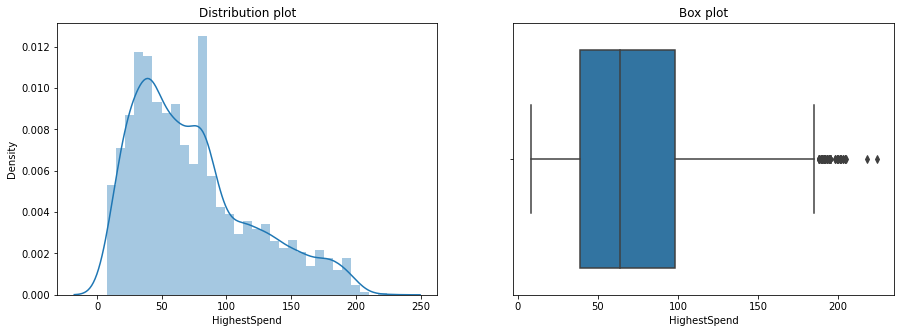

Total number of outliers in HighestSpend: 87
Percentage of outliers in HighestSpend: 1.94 %
 

 ZIPCODE


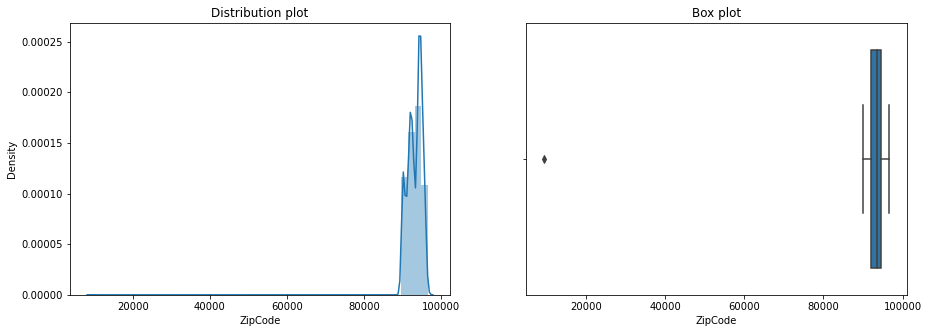

Total number of outliers in ZipCode: 1
Percentage of outliers in ZipCode: 0.02 %
 

 MONTHLYAVERAGESPEND


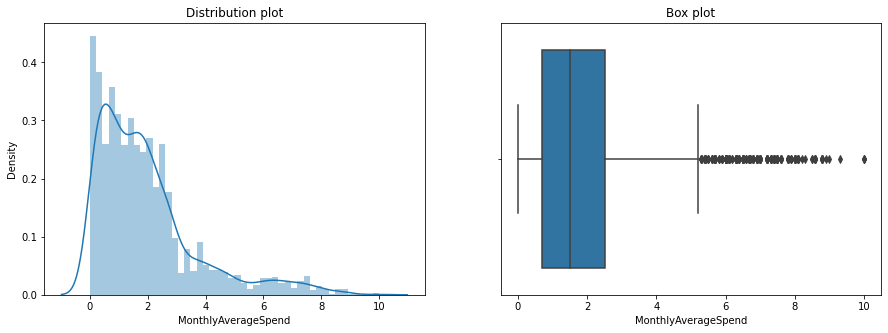

Total number of outliers in MonthlyAverageSpend: 297
Percentage of outliers in MonthlyAverageSpend: 6.63 %
 

 MORTGAGE


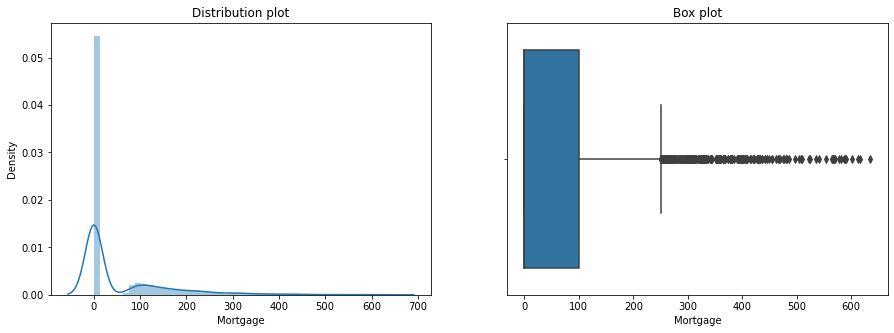

Total number of outliers in Mortgage: 260
Percentage of outliers in Mortgage: 5.8 %


In [26]:
for i in num_cols:
    print('{} \n\n {}'.format('\033[1m',i.upper()))
    f, axes = plt.subplots(1, 2, figsize=(15,5))
    sns.boxplot(x = i, data=df,  orient='h' , ax=axes[1])
    sns.distplot(df[i],  ax=axes[0])
    axes[0].set_title('Distribution plot')
    axes[1].set_title('Box plot')
    plt.show()
    
    
    q25,q75=np.percentile(df[i],25),np.percentile(df[i],75)
    IQR=q75-q25
    Threshold=IQR*1.5
    lower,upper=q25-Threshold,q75+Threshold
    Outliers=[i for i in df[i] if i<lower or i>upper]
    print('Total number of outliers in {}: {}'.format(i,len(Outliers)))
    percent=round((len(Outliers)/len(df[i]))*100,2)
    print('Percentage of outliers in {}: {} %'.format(i,percent))

***Univariate analysis of categorical variables***

#### HiddenScore

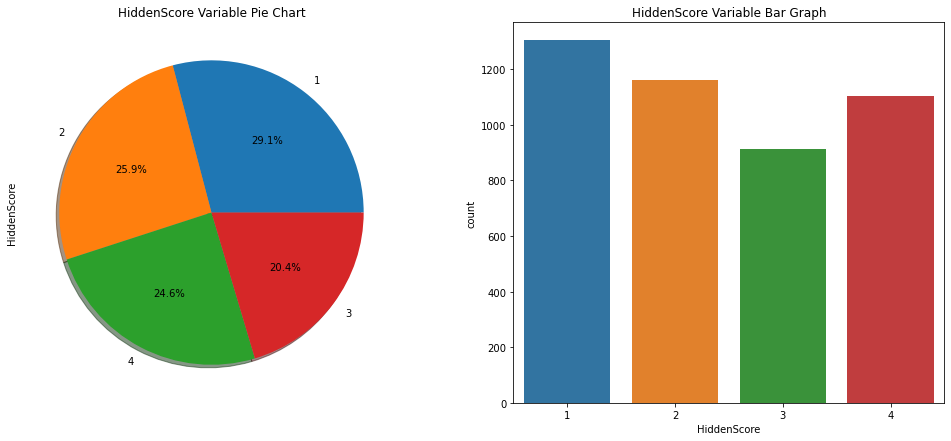

In [27]:
f,axes=plt.subplots(1,2,figsize=(17,7))
df['HiddenScore'].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[0],shadow=True)
sns.countplot('HiddenScore',data=df,ax=axes[1])
axes[0].set_title('HiddenScore Variable Pie Chart')
axes[1].set_title('HiddenScore Variable Bar Graph')
plt.show()


Nearly equal distribution of each category

#### Level

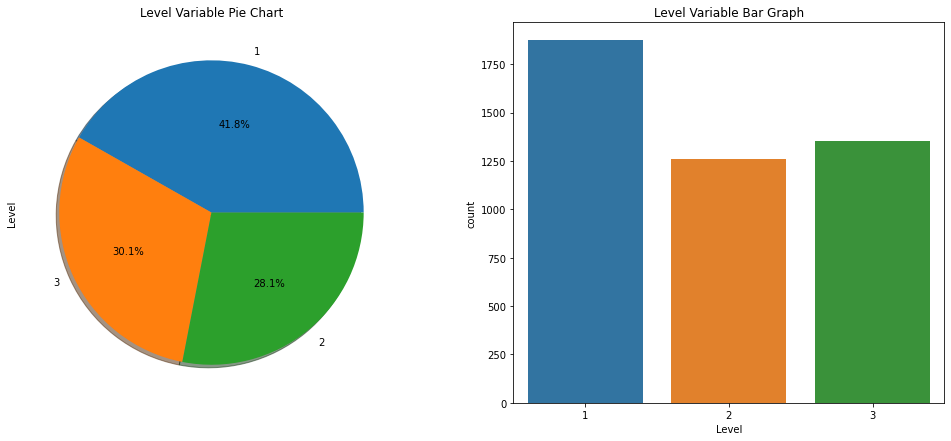

In [28]:
f,axes=plt.subplots(1,2,figsize=(17,7))
df['Level'].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[0],shadow=True)
sns.countplot('Level',data=df,ax=axes[1])
axes[0].set_title('Level Variable Pie Chart')
axes[1].set_title('Level Variable Bar Graph')
plt.show()

Level 2 and 3 has nearly equal distribution

Level 1 customers are more when compared to others

#### Security

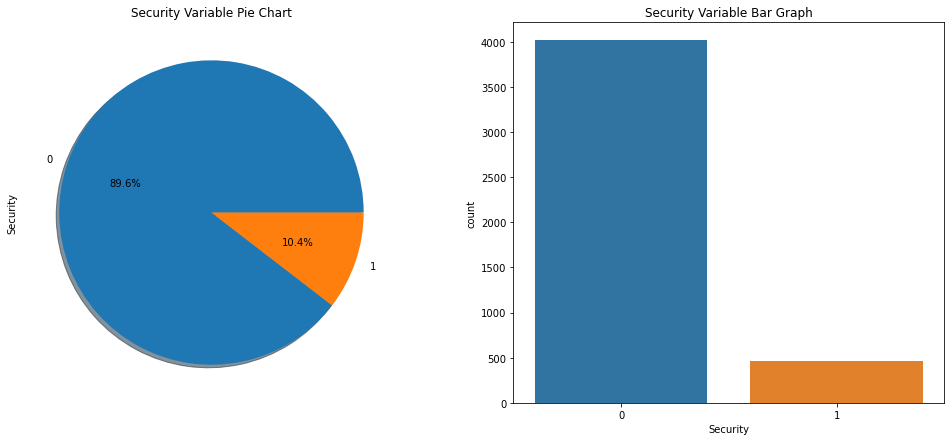

In [29]:
f,axes=plt.subplots(1,2,figsize=(17,7))
df['Security'].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[0],shadow=True)
sns.countplot('Security',data=df,ax=axes[1])
axes[0].set_title('Security Variable Pie Chart')
axes[1].set_title('Security Variable Bar Graph')
plt.show()

89.6% of Customer’s do not have security asset with the bank.

#### FixedDepositAccount

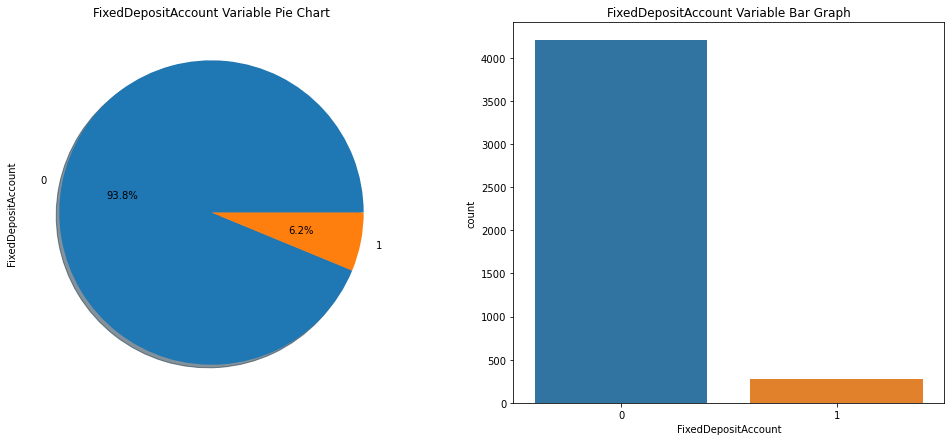

In [30]:
f,axes=plt.subplots(1,2,figsize=(17,7))
df['FixedDepositAccount'].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[0],shadow=True)
sns.countplot('FixedDepositAccount',data=df,ax=axes[1])
axes[0].set_title('FixedDepositAccount Variable Pie Chart')
axes[1].set_title('FixedDepositAccount Variable Bar Graph')
plt.show()

93.8% of customers does not have fixed deposit account

#### InternetBanking

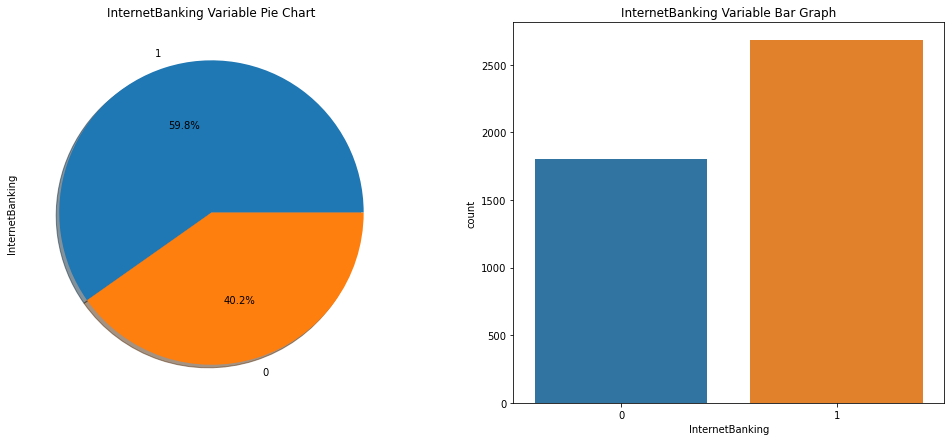

In [31]:
f,axes=plt.subplots(1,2,figsize=(17,7))
df['InternetBanking'].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[0],shadow=True)
sns.countplot('InternetBanking',data=df,ax=axes[1])
axes[0].set_title('InternetBanking Variable Pie Chart')
axes[1].set_title('InternetBanking Variable Bar Graph')
plt.show()

59.8% of the people uses InternetBanking

#### CreditCard

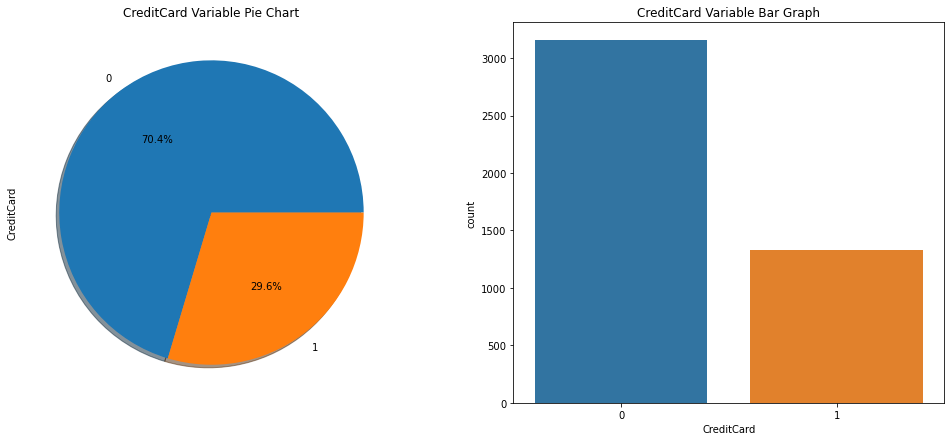

In [32]:
f,axes=plt.subplots(1,2,figsize=(17,7))
df['CreditCard'].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[0],shadow=True)
sns.countplot('CreditCard',data=df,ax=axes[1])
axes[0].set_title('CreditCard Variable Pie Chart')
axes[1].set_title('CreditCard Variable Bar Graph')
plt.show()

70.4 % of people uses bank's credit card

#### LoanOnCard

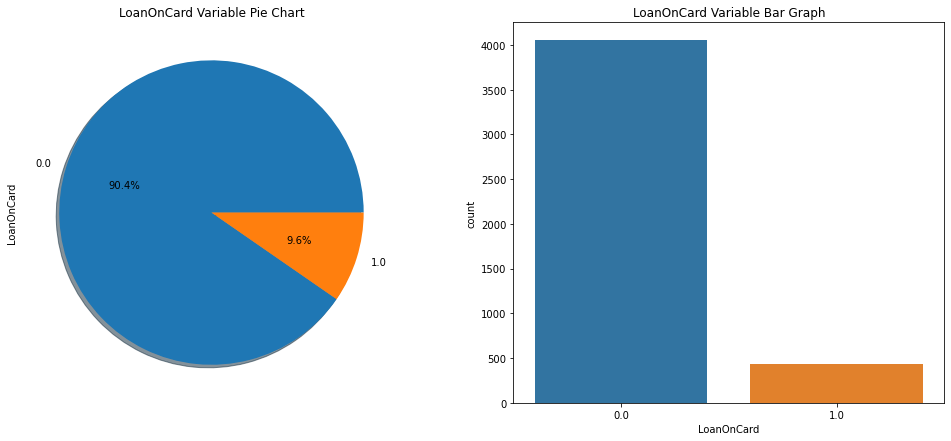

In [33]:
f,axes=plt.subplots(1,2,figsize=(17,7))
df['LoanOnCard'].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[0],shadow=True)
sns.countplot('LoanOnCard',data=df,ax=axes[1])
axes[0].set_title('LoanOnCard Variable Pie Chart')
axes[1].set_title('LoanOnCard Variable Bar Graph')
plt.show()

90.4% of people does not have loan on credit card

## Bi Variate analysis

###  Target vs Numerical

#### LoanOnCard vs Age

<AxesSubplot:xlabel='LoanOnCard'>

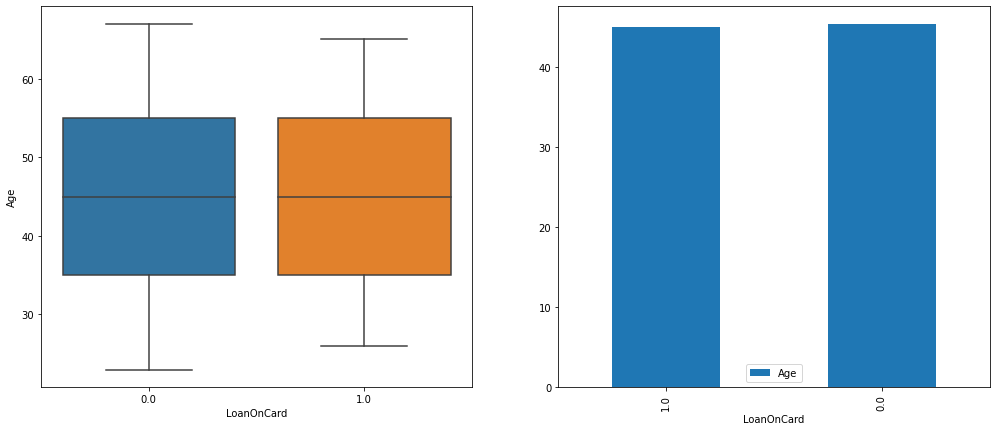

In [34]:
f,axes=plt.subplots(1,2,figsize=(17,7))
sns.boxplot(x='LoanOnCard', y='Age', data= df, ax=axes[0])
Data.groupby(by=['LoanOnCard'])['Age'].mean().reset_index().sort_values(['Age'],ascending=True).tail(10).plot(x='LoanOnCard',
                                                                                                           y='Age',
                                                                                                           kind='bar',
                                                                                                          ax=axes[1])

Mean values are almost equal so age is not a determining factor for taking loans.

Age distribution is nearly equal for both loan holders and non loan holders

#### LoanOnCard vs CustomerSince             

<AxesSubplot:xlabel='LoanOnCard'>

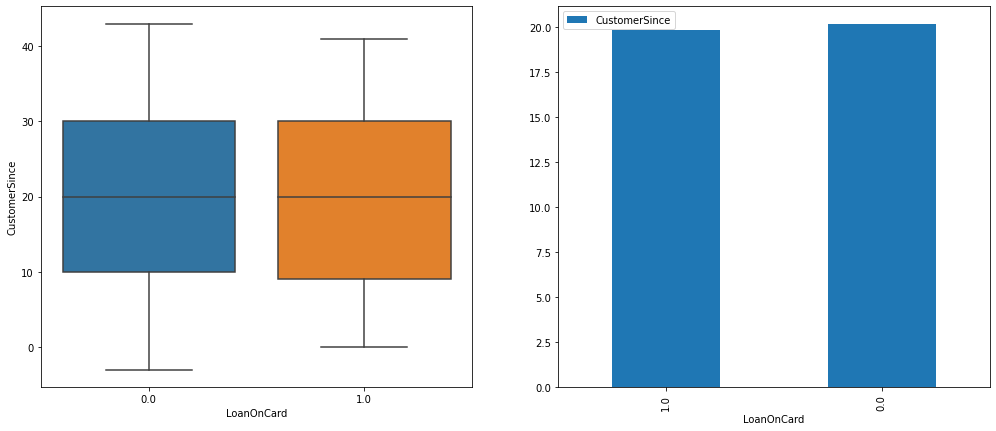

In [35]:
f,axes=plt.subplots(1,2,figsize=(17,7))
sns.boxplot(x='LoanOnCard', y='CustomerSince', data= df, ax=axes[0])
Data.groupby(by=['LoanOnCard'])['CustomerSince'].mean().reset_index().sort_values(['CustomerSince'],ascending=True).tail(10).plot(x='LoanOnCard',
                                                                                                           y='CustomerSince',
                                                                                                           kind='bar',
                                                                                                          ax=axes[1])

Mean values are nearly equal for both loan holders and non loan holders

Customer of the bank since has equal distribution on loan holders and non-loan holders.

#### LoanOnCard vs HighestSpend

<AxesSubplot:xlabel='LoanOnCard'>

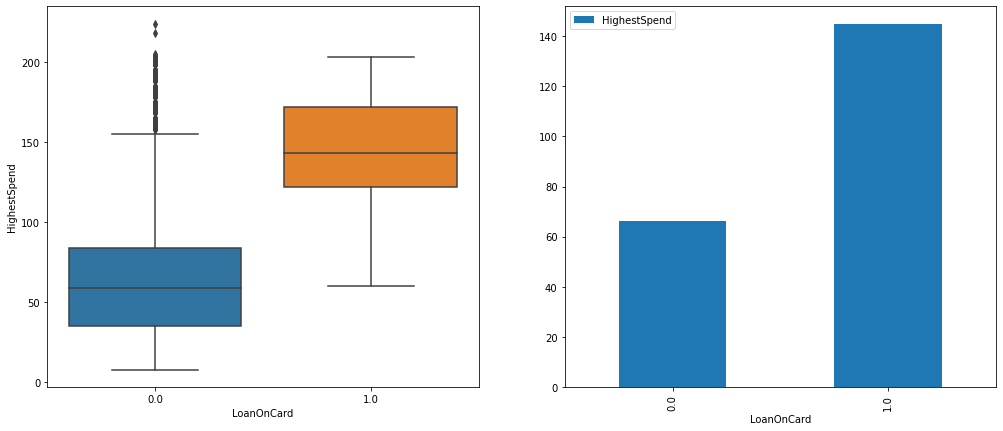

In [36]:
f,axes=plt.subplots(1,2,figsize=(17,7))
sns.boxplot(x='LoanOnCard', y='HighestSpend', data= df, ax=axes[0])
Data.groupby(by=['LoanOnCard'])['HighestSpend'].mean().reset_index().sort_values(['HighestSpend'],ascending=True).tail(10).plot(x='LoanOnCard',
                                                                                                           y='HighestSpend',
                                                                                                           kind='bar',
                                                                                                          ax=axes[1])

Mean value of highest spend is more for loan holders

People having loan on card spends more than who doesn't have

Some customer who does not have loan also spends more sometimes.

#### LoanOnCard vs MonthlyAverageSpend

<AxesSubplot:xlabel='LoanOnCard'>

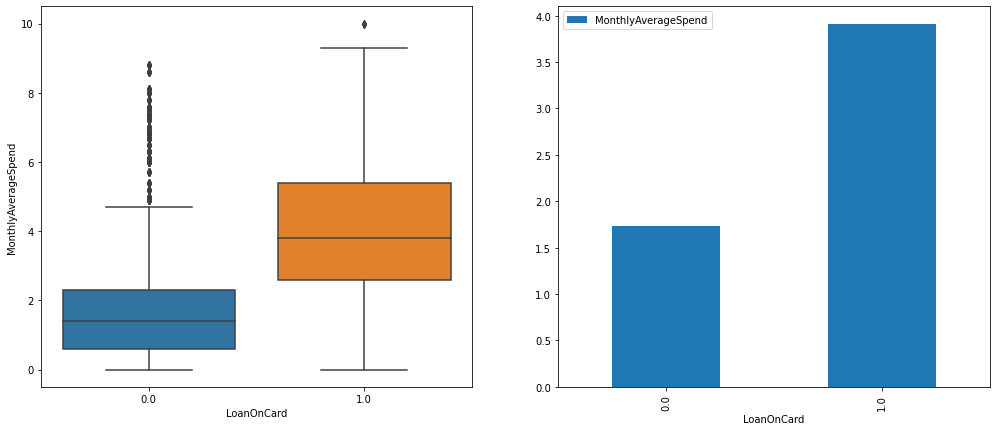

In [37]:
f,axes=plt.subplots(1,2,figsize=(17,7))
sns.boxplot(x='LoanOnCard', y='MonthlyAverageSpend', data= df, ax=axes[0])
Data.groupby(by=['LoanOnCard'])['MonthlyAverageSpend'].mean().reset_index().sort_values(['MonthlyAverageSpend'],ascending=True).tail(10).plot(x='LoanOnCard',
                                                                                                           y='MonthlyAverageSpend',
                                                                                                           kind='bar',
                                                                                                          ax=axes[1])

Mean value of MonthlyAverageSpend is more for Loan holders

People having loanOnCard have higher MonthlyAverageSpend

#### LoanOnCard vs Mortgage

<AxesSubplot:xlabel='LoanOnCard'>

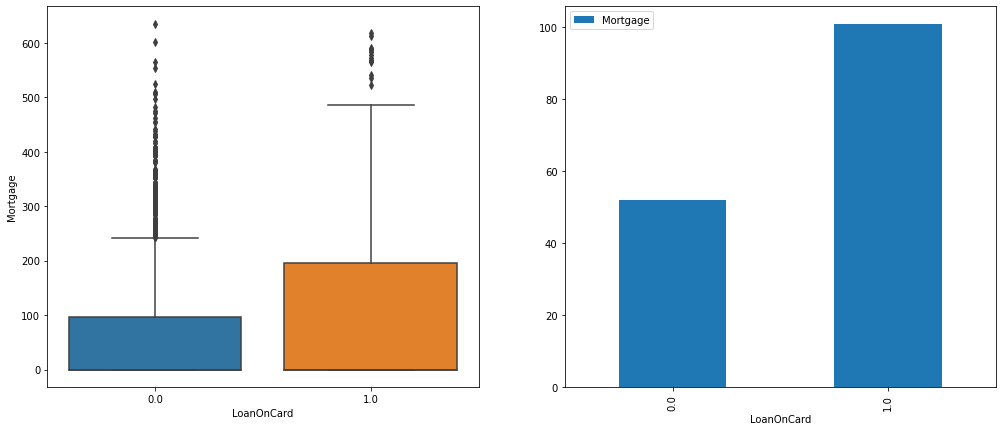

In [38]:
f,axes=plt.subplots(1,2,figsize=(17,7))
sns.boxplot(x='LoanOnCard', y='Mortgage', data= df, ax=axes[0])
Data.groupby(by=['LoanOnCard'])['Mortgage'].mean().reset_index().sort_values(['Mortgage'],ascending=True).tail(10).plot(x='LoanOnCard',
                                                                                                           y='Mortgage',
                                                                                                           kind='bar',
                                                                                                          ax=axes[1])

Mean value of Mortgage is higher for people who have LoanOnCard

Mortgage value is high for loan holders

### Numerical vs Numerical

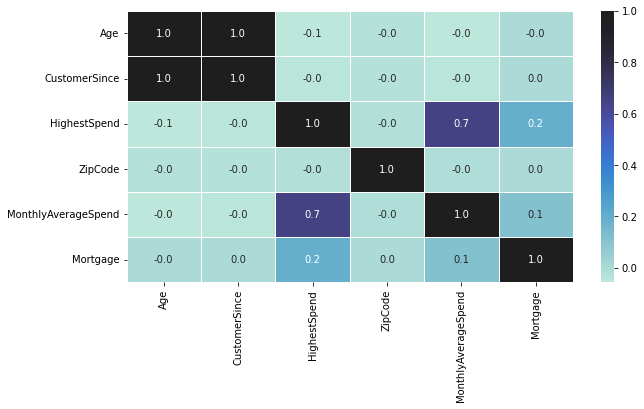

In [39]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f', center = 1 )  # heatmap
plt.show()

Age and customer since has correlation as 1. Any one can be used for the model.

Highest spend has large correlation with monthly average spend

Mortage and highest spend has little correlation

Rest of the variables does not have any relation

### Target(Categorical) vs Categorical

#### HiddenScore vs LoanOnCard             

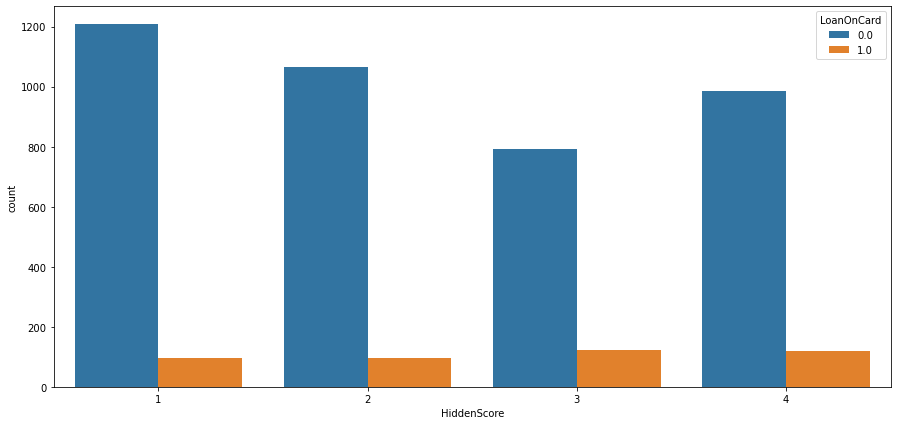

In [40]:
plt.figure(figsize=(15,7))
sns.countplot(df['HiddenScore'],hue=df['LoanOnCard'])
plt.show()

#### Level vs LoanOnCard

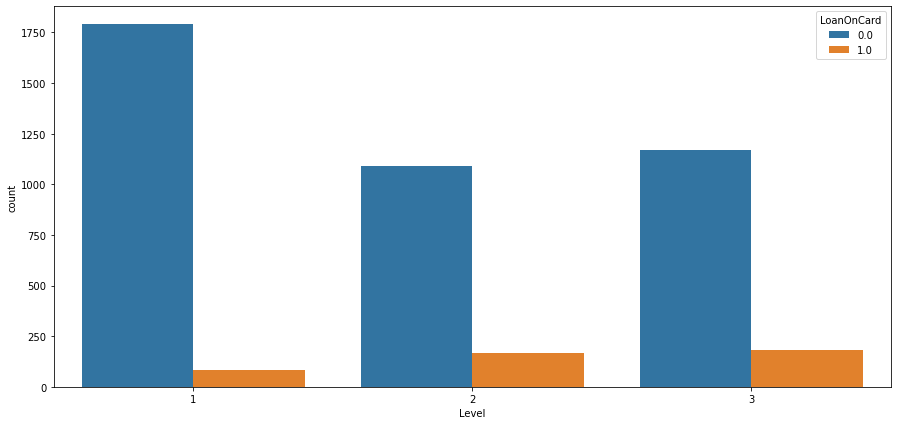

In [41]:
plt.figure(figsize=(15,7))
sns.countplot(df['Level'],hue=df['LoanOnCard'])
plt.show()

#### Security vs LoanOnCard

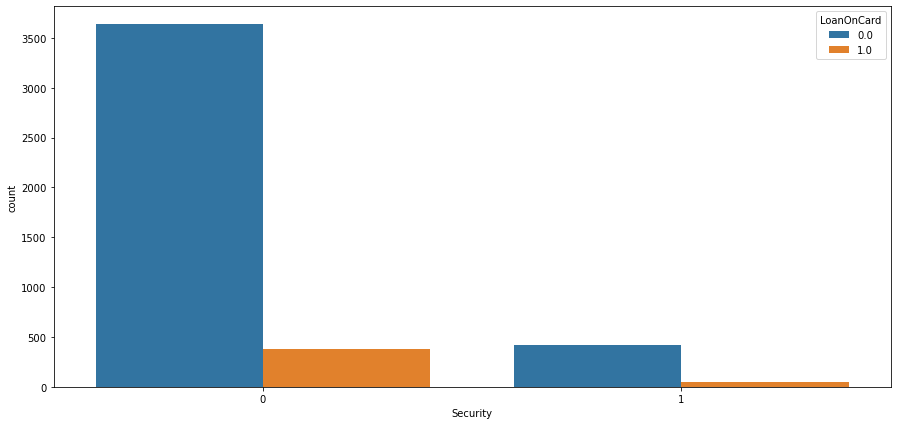

In [42]:
plt.figure(figsize=(15,7))
sns.countplot(df['Security'],hue=df['LoanOnCard'])
plt.show()

#### FixedDepositAccount vs LoanOnCard

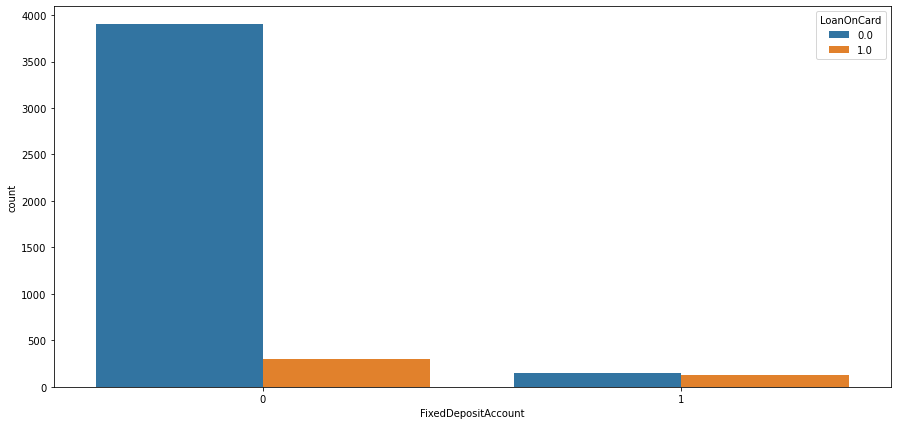

In [43]:
plt.figure(figsize=(15,7))
sns.countplot(df['FixedDepositAccount'],hue=df['LoanOnCard'])
plt.show()

#### InternetBanking vs LoanOnCard

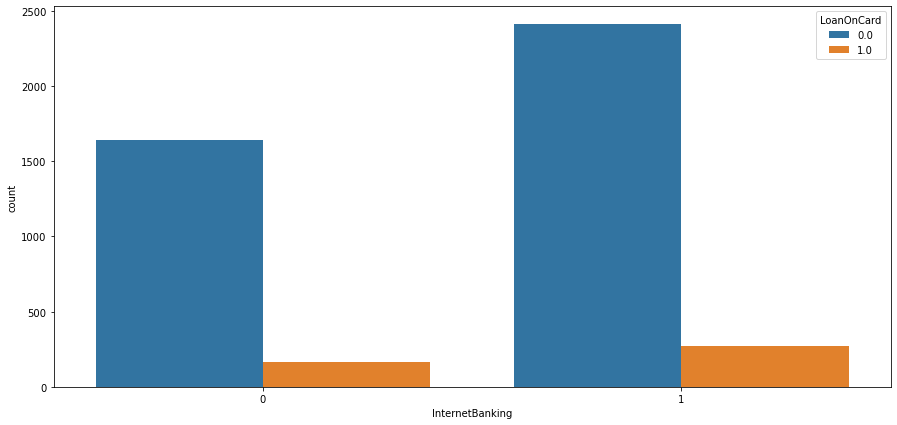

In [44]:
plt.figure(figsize=(15,7))
sns.countplot(df['InternetBanking'],hue=df['LoanOnCard'])
plt.show()

#### CreditCard vs LoanOnCard

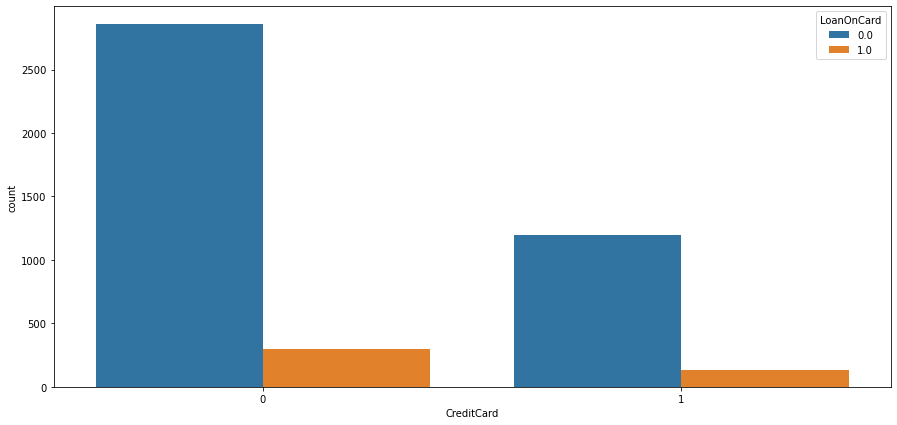

In [45]:
plt.figure(figsize=(15,7))
sns.countplot(df['CreditCard'],hue=df['LoanOnCard'])
plt.show()

## Multi Variate analysis

In [46]:
df.dtypes

Age                       int64
CustomerSince             int64
HighestSpend              int64
ZipCode                   int64
HiddenScore            category
MonthlyAverageSpend     float64
Level                  category
Mortgage                  int64
Security               category
FixedDepositAccount    category
InternetBanking        category
CreditCard             category
LoanOnCard             category
dtype: object

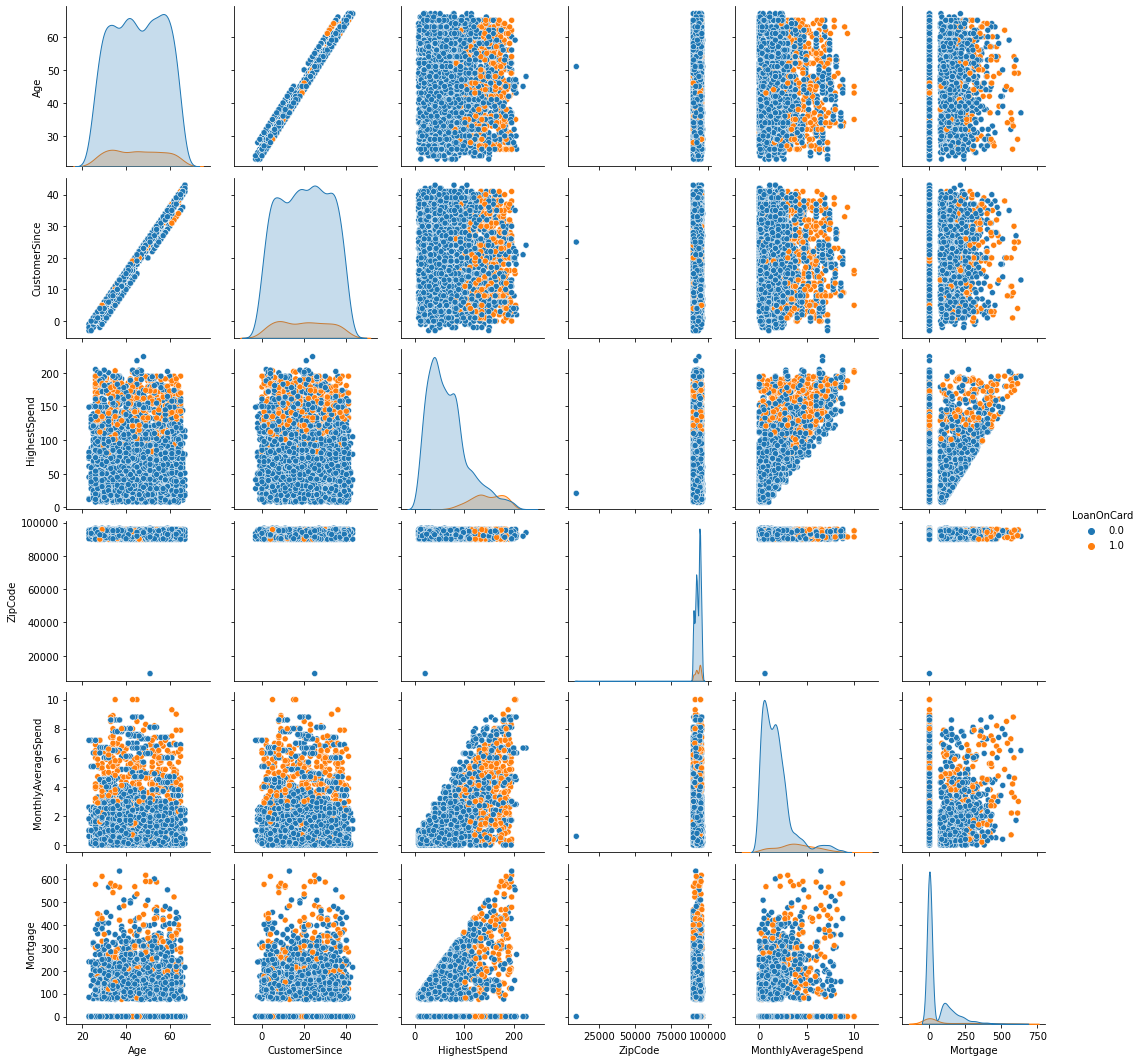

In [47]:
sns.pairplot(df,hue='LoanOnCard')

Age and CustomerSince are highly correlated,So any one of them can be choosen

ZipCode stays constant for all different X values,we cant draw any pattern from it.Therefore we can remove ZipCode from the dataset.

All the other independent features are not related to each other,So they can be used for building the model.

## 4.Data Pre-processing

### FEATURE ENGINEERING

In [48]:
X_train_final, X_validation, y_train_final, y_validation = train_test_split(X_train, y_train,  random_state = RS, test_size = 0.20, stratify = y_train)
X_train_final.shape, X_validation.shape

((3585, 13), (897, 13))

In [49]:
X_train_final.head()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard
1058,1059,59,34,24,94105,2,0.2,3,86,0,0,1,0
2620,2621,48,22,152,95616,1,0.0,1,0,0,0,0,0
2347,2348,64,39,8,92104,3,0.1,3,87,0,0,0,1
568,569,34,9,41,92101,2,0.1,1,161,0,0,1,1
2847,2848,44,18,21,90840,1,0.2,1,0,0,0,1,0


***Scaling the data***

In [50]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scale = pd.DataFrame(index = X_train_final.index)
X_validation_scale = pd.DataFrame(index = X_validation.index)
X_train_scale[num_cols] = scaler.fit_transform(X_train_final[num_cols])
X_validation_scale[num_cols] = scaler.transform(X_validation[num_cols])

In [51]:
X_train_final_1 = X_train_final.copy()
X_validation_1 = X_validation.copy()

X_train_final_1[X_train_scale.columns] = X_train_scale.copy()
X_validation_1[X_validation_scale.columns] = X_validation_scale.copy()

In [52]:
X_train_final_1.shape, y_train_final.shape, X_validation_1.shape, y_validation.shape

((3585, 13), (3585,), (897, 13), (897,))

### FEATURE SELECTION

***Checking for constant, quasi constant features***

In [53]:
from sklearn.feature_selection import VarianceThreshold

constant_filter = VarianceThreshold(threshold = 0.01)
constant_filter.fit(X_train_final_1)

VarianceThreshold(threshold=0.01)

In [54]:
constant_filter.get_support().sum()

13

There are no constant and quasi constant features in the dataset.

***Checking for duplicate features***

In [55]:
X_train_T = X_train_final_1.T
X_train_T.duplicated().sum()

0

There are no duplicate features in the dataset

***Checking for multicollinearity***

<BarContainer object of 7 artists>

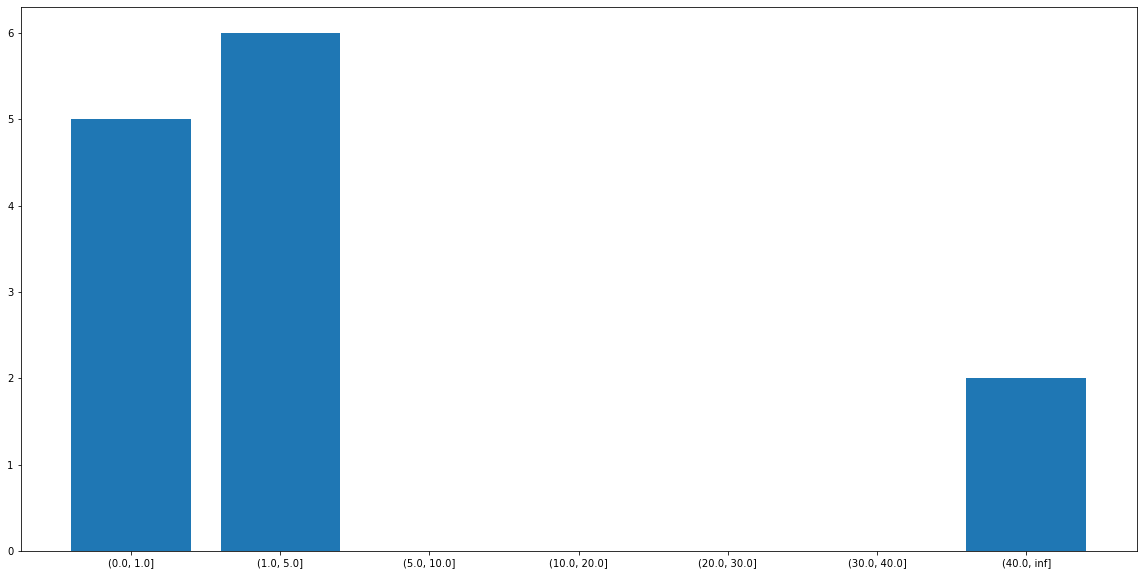

In [56]:
df1 = X_train_final_1.copy()
vif = pd.Series(np.linalg.inv(df1.corr().values).diagonal(),index=df1.columns,
          name='VIF').abs().sort_values(ascending=False).round(2)
df1 = pd.cut(vif.round(1),[0,1,5,10,20,30,40,float('inf')]).value_counts().sort_index()
df1.index = df1.index.map(str)

plt.subplots(figsize=(20, 10))
plt.bar(x=df1.index, height=df1)

- Generally VIF > 10 is considered as high, There are some features with VIF value greater than 40

In [57]:
def capture_vif(df,limit):
    high_vif = []
    while 1:
        temp_vif = pd.Series(np.linalg.inv(df.corr().values).diagonal(),index=df.columns,
          name='VIF').abs().sort_values(ascending=False).round(2)
        maxi = temp_vif.max()
        if maxi>limit:
            high_vif = temp_vif[temp_vif == maxi].index.tolist()[0]
            df = df.drop(high_vif,1)
        else:
            return df
    return

In [58]:
X_train_fs = capture_vif(X_train_final_1,10)
print(f'There are {X_train_fs.shape[0]} rows and {X_train_fs.shape[1]} columns\n')
X_train_fs.head(5)

There are 3585 rows and 12 columns



,ID,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard
1058,1059,1.192484,-1.076688,0.416606,2,-0.990146,3,0.302783,0,0,1,0
2620,2621,0.152957,1.722706,1.087416,1,-1.104519,1,-0.549660,0,0,0,0
2347,2348,1.625620,-1.426612,-0.471741,3,-1.047332,3,0.312695,0,0,0,1
568,569,-0.973198,-0.704894,-0.473072,2,-1.047332,1,1.046192,0,0,1,1
2847,2848,-0.193552,-1.142299,-1.032895,1,-0.990146,1,-0.549660,0,0,1,0


'Age' feature is removed because of high multicollinearity 

Let us remove 'ID' feature as it is unique for each record

In [59]:
X_train_fs.drop('ID', axis = 1, inplace = True)

***Feature selection by Recursive Feature Elimination with cross-validation***

In [60]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestRegressor

skf = StratifiedKFold(n_splits=5, random_state = RS, shuffle=True)
sel = RFECV(RandomForestClassifier(n_estimators = 100, random_state = RS, n_jobs = -1), cv = skf)
sel.fit(X_train_fs, y_train_final)

RFECV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
      estimator=RandomForestClassifier(n_jobs=-1, random_state=42))

In [61]:
print('Optimal number of features: {}'.format(sel.n_features_))

Optimal number of features: 6


In [62]:
features = X_train_fs.columns[sel.get_support()]
features

Index(['CustomerSince', 'HighestSpend', 'HiddenScore', 'MonthlyAverageSpend',
       'Level', 'FixedDepositAccount'],
      dtype='object')

Only these features contribute in predicting.

In [63]:
X_train_sel = pd.DataFrame(sel.transform(X_train_fs), columns = features)
X_train_sel.shape, y_train_final.shape

((3585, 6), (3585,))

### Checking on Target Imbalance

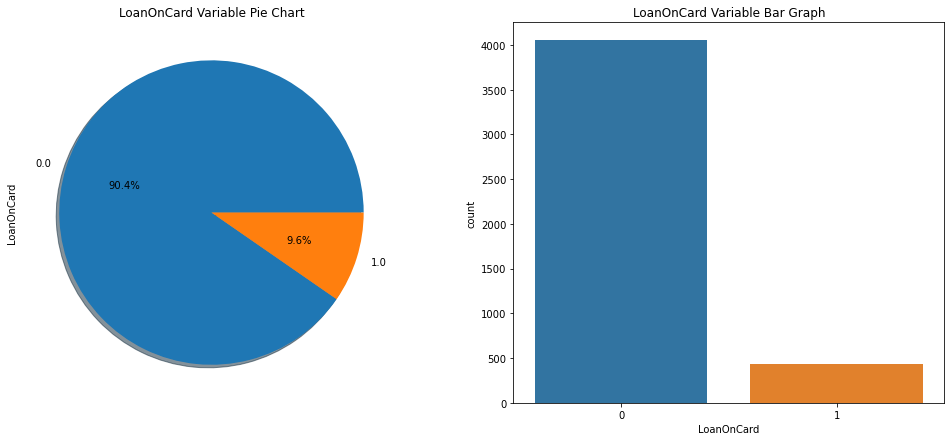

In [64]:
f,axes=plt.subplots(1,2,figsize=(17,7))
df['LoanOnCard'].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[0],shadow=True)
sns.countplot('LoanOnCard',data=df,ax=axes[1],order=[0,1])
axes[0].set_title('LoanOnCard Variable Pie Chart')
axes[1].set_title('LoanOnCard Variable Bar Graph')
plt.show()

Target variable is highly imbalanced

In [65]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(random_state = RS)
X_train_upsampled, y_train_upsampled = oversample.fit_resample(X_train_sel, y_train_final)

In [66]:
X_train_upsampled.shape, y_train_upsampled.shape

((6478, 6), (6478,))

In [67]:
X_validation_1 = X_validation_1.drop(['ID', 'Age'], axis = 1)
X_validation_sel = pd.DataFrame(sel.transform(X_validation_1), columns = features)
X_validation_sel.shape, y_validation.shape

((897, 6), (897,))

## MODEL BUILDING

In [68]:
scorer = {
    'accuracy' : metrics.make_scorer(metrics.accuracy_score),
    'precision' : metrics.make_scorer(metrics.precision_score),
    'recall' : metrics.make_scorer(metrics.recall_score),
    'f1' : metrics.make_scorer(metrics.f1_score),
    'loss' : metrics.make_scorer(metrics.log_loss)
}

In [69]:
import time

def fit_models(model, X_train, X_test, y_train, y_test):
    
    start = time.time()
    
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    
    accuracy = metrics.accuracy_score(y_test,pred)  
    precision = metrics.precision_score(y_test,pred)   
    recall = metrics.recall_score(y_test,pred)  
    f1 = metrics.f1_score(y_test,pred)
    loss = metrics.log_loss(y_test,pred)
    
    scorer = {
    'accuracy' : metrics.make_scorer(metrics.accuracy_score),
    'precision' : metrics.make_scorer(metrics.precision_score),
    'recall' : metrics.make_scorer(metrics.recall_score),
    'f1' : metrics.make_scorer(metrics.f1_score),
    'loss' : metrics.make_scorer(metrics.log_loss)
    }

    cv = cross_validate(estimator = model, X = X_train, y = y_train, cv=10, scoring = scorer)
    
    accuracy_cv = cv['test_accuracy'].mean()
    precision_cv = cv['test_precision'].mean()
    recall_cv = cv['test_recall'].mean()
    f1_cv = cv['test_f1'].mean()
    loss_cv = cv['test_loss'].mean()
    
    end = time.time()  #note the end time 
    duration = end - start  # calculate the total duration

    return f1, accuracy, precision, recall, loss, f1_cv, accuracy_cv, precision_cv, recall_cv, loss_cv, duration

In [70]:
lr = LogisticRegression(random_state = RS)
gnb = GaussianNB()
knn = KNeighborsClassifier()
svm = SVC(random_state = RS)
dT_gini = DecisionTreeClassifier(random_state = RS)
dT_entropy = DecisionTreeClassifier(random_state = RS)
bgcl = BaggingClassifier(n_estimators=100,random_state = RS)
abcl = AdaBoostClassifier(n_estimators=100, random_state = RS)
gbcl = GradientBoostingClassifier(n_estimators = 100,random_state = RS)
rfcl = RandomForestClassifier(n_estimators = 100, random_state = RS)
xgbcl = XGBClassifier(n_estimators = 100, random_state = RS, eval_metric = 'logloss')

result = {}

for model,name in zip([lr, gnb, knn, svm, dT_gini, dT_entropy, bgcl, abcl, gbcl, rfcl, xgbcl],
                     ['Logistic Regression', 'Gaussian NB', 'KNN', 'SVC', 'Decision Tree(gini)',
                     'Decision Tree(entropy)', 'Bagging Classifier', 'Adaptive Boosting', 
                      'Gradient Boosting', 'Random Forest Classifier', 'XGB Classifier']):
    result[name] = fit_models(model,X_train_upsampled, X_validation_sel, y_train_upsampled, y_validation)

In [71]:
result1 = pd.DataFrame(np.array(list(result.values())),    # make a dataframe out of the metrics from result dictionary 
                       columns= ['F1-SCORE', 'ACCURACY', 'PRECISION', 'RECALL', 'LOG LOSS', 'F1_SCORE(CV)', 'ACCURACY(CV)', 
                                'PRECISION(CV)', 'RECALL(CV)',  'LOG LOSS(CV)', 'DURATION'], 
                       index= result.keys())   # use the model names as index

result1.index.name = 'Model'   # name the index of the result1 dataframe as 'Model'

result1

,F1-SCORE,ACCURACY,PRECISION,RECALL,LOG LOSS,F1_SCORE(CV),ACCURACY(CV),PRECISION(CV),RECALL(CV),LOG LOSS(CV),DURATION
Model,,,,,,,,,,,
Logistic Regression,0.583026,0.874025,0.427027,0.918605,4.351133,0.904490,0.903828,0.899149,0.910156,3.321697,0.194136
Gaussian NB,0.557252,0.870680,0.414773,0.848837,4.466645,0.850156,0.854275,0.874824,0.827108,5.033196,0.078150
KNN,0.913295,0.983278,0.908046,0.918605,0.577579,0.992019,0.991973,0.986584,0.997530,0.277259,0.360899
SVC,0.832487,0.963211,0.738739,0.953488,1.270683,0.972837,0.972832,0.972595,0.973141,0.938348,3.196913
Decision Tree(gini),0.892655,0.978818,0.868132,0.918605,0.731601,0.988521,0.988577,0.988929,0.988272,0.394552,0.140765
Decision Tree(entropy),0.892655,0.978818,0.868132,0.918605,0.731601,0.988521,0.988577,0.988929,0.988272,0.394552,0.124970
Bagging Classifier,0.919540,0.984392,0.909091,0.930233,0.539074,0.990408,0.990429,0.989258,0.991667,0.330575,5.188368
Adaptive Boosting,0.750000,0.937570,0.608696,0.976744,2.156315,0.951076,0.950601,0.939585,0.963258,1.706195,3.607115
Gradient Boosting,0.923077,0.984392,0.875000,0.976744,0.539077,0.987786,0.987806,0.985589,0.990123,0.421187,4.938827


XGB Classifier has the highest CV score. So let us choose XGB Classifier as our final model

### Model evaluation function

In [72]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import log_loss
from sklearn.metrics import precision_recall_curve, roc_auc_score, auc, roc_curve

def evaluation(clf, X, y):
    pred = clf.predict(X)
    y_predict_proba = clf.predict_proba(X)[:, 1]
    
    precision, recall, thresholds = precision_recall_curve(y, y_predict_proba)
    fpr, tpr, thresholds = roc_curve(y, y_predict_proba)
    f1 = f1_score(y, pred)
    loss = log_loss(y, pred)
    
    return{
        'ROC AUC': auc(fpr, tpr), # Alternatively: roc_auc_score(y, y_predict_proba)
        'PRECISION-RECALL AUC': auc(recall, precision), # Alternatively (with slight difference): average_precision_score(y, y_predict_proba)
        'F1-SCORE': f1,
        'LOSS': loss
    }

## XGB CLASSIFIER

In [73]:
xgbcl.score(X_train_upsampled, y_train_upsampled)

1.0

In [74]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV


pred = xgbcl.predict(X_validation_sel)
report = pd.DataFrame(classification_report(y_validation, pred, output_dict=True)).T
report

,precision,recall,f1-score,support
0.0,0.996283,0.991369,0.993820,811.000000
1.0,0.922222,0.965116,0.943182,86.000000
accuracy,0.988852,0.988852,0.988852,0.988852
macro avg,0.959252,0.978242,0.968501,897.000000
weighted avg,0.989182,0.988852,0.988965,897.000000


### Model evaluation

In [75]:
evaluation(xgbcl, X_validation_sel, y_validation)

{'ROC AUC': 0.9993691394488573,
 'PRECISION-RECALL AUC': 0.9944376487585475,
 'F1-SCORE': 0.9431818181818181,
 'LOSS': 0.38505391430448055}

- XGB classifier is overfitting.
- We need to tune our hyperparameters to reduce overfitting.(Hyperparameter tuning is one of the many ways to reduce overfitting)

***XGB Classifier Hyperparameter tuning***

In [76]:
params={'n_estimators':[500,700,800,900],
       'max_depth':[1,3,5,7,9],
       'learning_rate':[0.01,0.1],
        'objective':['binary:logistic'],
        'eval_metric':['error']
       }

In [77]:
xgb_clf_hp = XGBClassifier()

rdm_xgb = RandomizedSearchCV(estimator = xgb_clf_hp, param_distributions = params, n_iter = 100, cv=skf, n_jobs = -1)
rdm_xgb.fit(X_train_upsampled, y_train_upsampled)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False, gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None...
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None,
                                           reg_alpha=None, reg_lambda=None,
                                           scal

In [78]:
rdm_xgb.best_params_

{'objective': 'binary:logistic',
 'n_estimators': 700,
 'max_depth': 5,
 'learning_rate': 0.1,
 'eval_metric': 'error'}

In [79]:
xgb_clf_hp = XGBClassifier(**rdm_xgb.best_params_)
xgb_clf_hp.fit(X_train_upsampled, y_train_upsampled)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='error', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=5, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=700, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [80]:
xgb_clf_hp.score(X_train_upsampled, y_train_upsampled)

1.0

### PREDICTION ON VALIDATION DATA AFTER HPT

In [81]:
pred = xgb_clf_hp.predict(X_validation_sel)
report = pd.DataFrame(classification_report(y_validation, pred, output_dict=True)).T
report

,precision,recall,f1-score,support
0.0,0.997519,0.991369,0.994434,811.000000
1.0,0.923077,0.976744,0.949153,86.000000
accuracy,0.989967,0.989967,0.989967,0.989967
macro avg,0.960298,0.984056,0.971793,897.000000
weighted avg,0.990382,0.989967,0.990093,897.000000


Overfitting is reduced to an extent

### Model evaluation

In [82]:
evaluation(xgb_clf_hp, X_validation_sel, y_validation)

{'ROC AUC': 0.9993404639692599,
 'PRECISION-RECALL AUC': 0.9942231932913359,
 'F1-SCORE': 0.9491525423728814,
 'LOSS': 0.34654914686310856}

### PREDICTION ON TEST DATA

In [83]:
X_test.shape, y_test.shape

((498, 13), (498,))

In [84]:
X_test_1 = X_test.copy()
y_test_1 = y_test.copy()

***Scaling the data***

In [85]:
X_test_1[num_cols] = scaler.transform(X_test_1[num_cols])

In [86]:
X_test_1.drop(['ID', 'Age'], axis = 1, inplace = True)

***Feature selection by Recursive Feature Elimination with cross-validation***

In [87]:
X_test_sel = pd.DataFrame(sel.transform(X_test_1), columns = features)

### Prediction made by the vanilla model

In [88]:
pred = xgbcl.predict(X_test_sel)
report = pd.DataFrame(classification_report(y_test_1, pred, output_dict=True)).T
report

,precision,recall,f1-score,support
0.0,0.995536,0.991111,0.993318,450.000000
1.0,0.920000,0.958333,0.938776,48.000000
accuracy,0.987952,0.987952,0.987952,0.987952
macro avg,0.957768,0.974722,0.966047,498.000000
weighted avg,0.988255,0.987952,0.988061,498.000000


### Model evaluation

In [89]:
evaluation(xgbcl, X_test_sel, y_test_1)

{'ROC AUC': 0.9991666666666668,
 'PRECISION-RECALL AUC': 0.9934247029219428,
 'F1-SCORE': 0.9387755102040817,
 'LOSS': 0.41613625855258096}

### Prediction made by the hyperparameter tuned model

In [90]:
pred = xgb_clf_hp.predict(X_test_sel)
report = pd.DataFrame(classification_report(y_test_1, pred, output_dict=True)).T
report

,precision,recall,f1-score,support
0.0,0.995546,0.993333,0.994438,450.00000
1.0,0.938776,0.958333,0.948454,48.00000
accuracy,0.989960,0.989960,0.989960,0.98996
macro avg,0.967161,0.975833,0.971446,498.00000
weighted avg,0.990074,0.989960,0.990006,498.00000


### Model evaluation

In [91]:
evaluation(xgb_clf_hp, X_test_sel, y_test_1)

{'ROC AUC': 0.9993981481481482,
 'PRECISION-RECALL AUC': 0.9951137825063481,
 'F1-SCORE': 0.9484536082474228,
 'LOSS': 0.34677968025470773}

- We can see that Hyperparameter tuning does really help our model to learn more.

## XGB CLASSIFIER - PIPELINE

In [92]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector

my_cols = ['CustomerSince', 'HighestSpend', 'HiddenScore', 'MonthlyAverageSpend',
       'Level', 'FixedDepositAccount']

cols_to_scale_transform = Pipeline(steps=[
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(transformers = [
    ('selector', 'passthrough', my_cols),
    ('cols_to_scale', cols_to_scale_transform, num_cols)
    
], remainder="drop")


In [93]:
from imblearn.pipeline import make_pipeline

clf = make_pipeline(preprocessor,
                    SMOTE(random_state = 42),
                    XGBClassifier())

params=[{'xgbclassifier': [XGBClassifier()],
        'xgbclassifier__n_estimators': [500,700,800,900],
        'xgbclassifier__max_depth': [1,3,5,7,9],
        'xgbclassifier__learning_rate': [0.01,0.1],
        'xgbclassifier__objective': ['binary:logistic'],
        'xgbclassifier__eval_metric': ['error']
        }]
ran_search = RandomizedSearchCV(estimator = clf, param_distributions = params, n_iter = 100, cv = skf, random_state=RS, n_jobs = -1)
best_model = ran_search.fit(X_train, y_train)

In [94]:
best_model.best_params_

{'xgbclassifier__objective': 'binary:logistic',
 'xgbclassifier__n_estimators': 500,
 'xgbclassifier__max_depth': 7,
 'xgbclassifier__learning_rate': 0.1,
 'xgbclassifier__eval_metric': 'error',
 'xgbclassifier': XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
               colsample_bynode=None, colsample_bytree=None,
               enable_categorical=False, eval_metric='error', gamma=None,
               gpu_id=None, importance_type=None, interaction_constraints=None,
               learning_rate=0.1, max_delta_step=None, max_depth=7,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=500, n_jobs=None, num_parallel_tree=None,
               predictor=None, random_state=None, reg_alpha=None,
               reg_lambda=None, scale_pos_weight=None, subsample=None,
               tree_method=None, validate_parameters=None, verbosity=None)}

### Prediction made by hyperparameter tuned model(PIPELINE) on test data

In [95]:
pred = best_model.predict(X_test)
report = pd.DataFrame(classification_report(y_test, pred, output_dict=True)).T
report

,precision,recall,f1-score,support
0.0,0.995546,0.993333,0.994438,450.00000
1.0,0.938776,0.958333,0.948454,48.00000
accuracy,0.989960,0.989960,0.989960,0.98996
macro avg,0.967161,0.975833,0.971446,498.00000
weighted avg,0.990074,0.989960,0.990006,498.00000


### Model evaluation

In [96]:
evaluation(best_model, X_test, y_test)

{'ROC AUC': 0.999537037037037,
 'PRECISION-RECALL AUC': 0.9956960549482271,
 'F1-SCORE': 0.9484536082474228,
 'LOSS': 0.34677968025470773}

## TRAINING OUR MODEL ON ENTIRE DATASET WITH THE CHOSEN MODEL AND HYPERPARAMETERS

In [97]:
prod_clf = make_pipeline(preprocessor, 
                    SMOTE(random_state = 42),
                    best_model.best_params_['xgbclassifier'])

prod_model = prod_clf.fit(X,Y)

In [98]:
all_accuracies = cross_validate(estimator=prod_model, X = X, y = Y, cv=10, scoring = scorer, n_jobs = -1)

In [99]:
all_accuracies

{'fit_time': array([6.14402652, 6.59516835, 6.59417057, 6.87358689, 6.72977543,
        6.75224161, 6.77088451, 6.59383154, 6.76090789, 6.53799462]),
 'score_time': array([0.01562357, 0.01562142, 0.01562142, 0.01562166, 0.01836753,
        0.00600815, 0.01562095, 0.01562071, 0.01562095, 0.01562119]),
 'test_accuracy': array([0.98192771, 0.98594378, 0.98995984, 0.98995984, 0.98795181,
        0.98795181, 0.98995984, 0.99196787, 0.9939759 , 0.98594378]),
 'test_precision': array([0.88235294, 0.93617021, 1.        , 0.95744681, 0.95652174,
        0.9375    , 0.95744681, 0.97826087, 1.        , 0.93617021]),
 'test_recall': array([0.9375    , 0.91666667, 0.89583333, 0.9375    , 0.91666667,
        0.9375    , 0.9375    , 0.9375    , 0.9375    , 0.91666667]),
 'test_f1': array([0.90909091, 0.92631579, 0.94505495, 0.94736842, 0.93617021,
        0.9375    , 0.94736842, 0.95744681, 0.96774194, 0.92631579]),
 'test_loss': array([0.62420439, 0.48548963, 0.34677486, 0.34677807, 0.41613305,
    

## CHECKING WHETHER CV TEST ACCURACY IS NORMALLY DISTRIBUTED

In [100]:
DataToTest = all_accuracies['test_accuracy']
stat, p = shapiro(DataToTest)
print('stat = %.2f, p = %.30f' % (stat, p))

if p > 0.05:
    print('Normal distribution')
    print()
else:
    print('Not a normal distribution')
    print()

stat = 0.97, p = 0.849730789661407470703125000000
Normal distribution



In [101]:
avg_score = all_accuracies['test_accuracy'].mean()
std = all_accuracies['test_accuracy'].std()
std_2 = std * 2
production_acc_min = avg_score - std_2
production_acc_max = avg_score + std_2
print("Average cv score: ", avg_score)
print("Standard deviation: ", std)
print("Accuracy of our model will range from {} to {} (WITH 95% CONFIDENCE) ".format(production_acc_min, production_acc_max))

Average cv score:  0.98855421686747
Standard deviation:  0.003244075185020785
Accuracy of our model will range from 0.9820660664974284 to 0.9950423672375116 (WITH 95% CONFIDENCE) 


## MODEL PICKLING

In [102]:
import pickle
filename = 'Customer_prediction(With make_column_selector).sav'
pickle.dump(prod_model, open(filename, 'wb'))

In [103]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

In [104]:
result = loaded_model.predict(data_p)

In [105]:
result

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])